<font size="4">Imports </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFECV


from sklearn.ensemble import RandomForestClassifier


# machine learning
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

<font size="4">Choosing Table </font>

In [2]:
#Tuesday
df_treino = pd.read_csv('/home/jupyter/Jupyter/notebook/share/Dados/AttackOnlyLoit',sep=',',skipinitialspace=True)
df_treino.columns = df_treino.columns.str.replace(' ', '')
#Renomear dfs...
df_WeekDays = pd.read_csv('/home/jupyter/Jupyter/notebook/share/Dados/TODOS-slowloris',sep=',',skipinitialspace=True)
df_WeekDays.columns = df_WeekDays.columns.str.replace(' ', '')



In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
#df_treino = df_treino.sample(frac=0.1)

In [5]:
df_treino.groupby("Label").count()["DestinationPort"]

Label
BENIGN     97718
DDoS      128027
Name: DestinationPort, dtype: int64

In [6]:
df_WeekDays.groupby("Label").count()["DestinationPort"]

Label
BENIGN                        1040291
DoS GoldenEye                   10293
DoS Hulk                       231073
DoS Slowhttptest                 5499
FTP-Patator                      7938
Heartbleed                         11
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
Name: DestinationPort, dtype: int64

In [7]:
df_treino

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df_WeekDays

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303177,55641,49,1,3,6,18,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1303178,45337,217,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1303179,22,1387547,41,46,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1303180,22,207,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<font size="4">Creating binary Target column </font>

In [9]:
df_treino["Target"] = np.where(df_treino['Label'] == 'BENIGN', 0, 1)
df_treino.Target.unique()

array([0, 1])

In [10]:
df_WeekDays["Target"] = np.where(df_WeekDays['Label'] == 'BENIGN', 0, 1)
df_WeekDays.Target.unique()

array([0, 1])

In [11]:
df_WeekDays.groupby("Target").count()["DestinationPort"]

Target
0    1040291
1     262891
Name: DestinationPort, dtype: int64

In [12]:
df_WeekDays.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

### Describe das variaveis

In [13]:
df_treino.loc[:].describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Target
count,225745.00000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,225745.000000,...,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,225745.000000
mean,8879.61946,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,164.826715,214.907242,...,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06,0.567131
std,19754.64740,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,504.892965,797.411073,...,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07,0.495474
min,0.00000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.00000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.00000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.00000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,...,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06,1.000000
max,65532.00000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


In [14]:
df_WeekDays.loc[:].describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Target
count,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,...,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06,1.303182e+06
mean,7.092786e+03,1.995045e+07,1.106644e+01,1.253659e+01,5.456897e+02,2.067661e+04,2.049915e+02,1.797142e+01,5.481799e+01,6.712787e+01,...,-4.505328e+03,7.822007e+04,4.030304e+04,1.538021e+05,5.626868e+04,1.324125e+07,2.935671e+05,1.346700e+07,1.298959e+07,2.017301e-01
std,1.753209e+04,3.818592e+07,8.478887e+02,1.130048e+03,6.243959e+03,2.568041e+06,5.466270e+02,4.582411e+01,1.370459e+02,1.935223e+02,...,1.559775e+06,6.493666e+05,3.788932e+05,1.032849e+06,5.851731e+05,3.047394e+07,3.445851e+06,3.079077e+07,3.037451e+07,4.012919e-01
min,0.000000e+00,-4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.930000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,4.751200e+04,2.000000e+00,2.000000e+00,7.300000e+01,1.590000e+02,4.300000e+01,0.000000e+00,3.900000e+01,0.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.931880e+06,6.000000e+00,5.000000e+00,3.520000e+02,2.279000e+03,3.100000e+02,3.700000e+01,5.340000e+01,1.046107e+02,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.552900e+04,1.200000e+08,2.064460e+05,2.760720e+05,2.428415e+06,6.270000e+08,2.482000e+04,2.065000e+03,4.672000e+03,6.429191e+03,...,1.380000e+02,1.070000e+08,7.420000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [15]:
df_treino.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

 <font size="4">Droping Label table </font>

In [16]:
df_treino = df_treino.drop(["Label"], axis=1)
df_WeekDays = df_WeekDays.drop(["Label"], axis=1)
################################################
df_WeekDays.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

 <font size="4">Columns with NULL values </font>

In [17]:
df_treino.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
TotalLengthofBwdPackets    0
FwdPacketLengthMax         0
FwdPacketLengthMin         0
FwdPacketLengthMean        0
FwdPacketLengthStd         0
BwdPacketLengthMax         0
BwdPacketLengthMin         0
BwdPacketLengthMean        0
BwdPacketLengthStd         0
FlowBytes/s                4
FlowPackets/s              0
FlowIATMean                0
FlowIATStd                 0
FlowIATMax                 0
FlowIATMin                 0
FwdIATTotal                0
FwdIATMean                 0
FwdIATStd                  0
FwdIATMax                  0
FwdIATMin                  0
BwdIATTotal                0
BwdIATMean                 0
BwdIATStd                  0
BwdIATMax                  0
BwdIATMin                  0
FwdPSHFlags                0
BwdPSHFlags                0
FwdURGFlags                0
BwdURGFlags                0
FwdHeaderLengt

In [18]:
df_WeekDays.isnull().sum()

DestinationPort               0
FlowDuration                  0
TotalFwdPackets               0
TotalBackwardPackets          0
TotalLengthofFwdPackets       0
TotalLengthofBwdPackets       0
FwdPacketLengthMax            0
FwdPacketLengthMin            0
FwdPacketLengthMean           0
FwdPacketLengthStd            0
BwdPacketLengthMax            0
BwdPacketLengthMin            0
BwdPacketLengthMean           0
BwdPacketLengthStd            0
FlowBytes/s                1229
FlowPackets/s                 0
FlowIATMean                   0
FlowIATStd                    0
FlowIATMax                    0
FlowIATMin                    0
FwdIATTotal                   0
FwdIATMean                    0
FwdIATStd                     0
FwdIATMax                     0
FwdIATMin                     0
BwdIATTotal                   0
BwdIATMean                    0
BwdIATStd                     0
BwdIATMax                     0
BwdIATMin                     0
FwdPSHFlags                   0
BwdPSHFl

 <font size="4"> Verificando valores dde máximo e minimo das colunas e se são iguais (valor constante) e removendo </font>

In [19]:
for c in df_treino.columns:
    if((df_treino[c]).max()) == ((df_treino[c]).min()):
        df_treino = df_treino.drop([c], axis=1)

In [20]:
for c in df_WeekDays.columns:
    if((df_WeekDays[c]).max()) == ((df_WeekDays[c]).min()):
        df_WeekDays = df_WeekDays.drop([c], axis=1)

 <font size="4">0 = Benign || 1 = Atack </font>

In [21]:
df_WeekDays.groupby("Target").count()["DestinationPort"]

Target
0    1040291
1     262891
Name: DestinationPort, dtype: int64

In [22]:
[(c,np.isinf(df_treino[c]).sum()) for c in df_treino.columns]

[('DestinationPort', 0),
 ('FlowDuration', 0),
 ('TotalFwdPackets', 0),
 ('TotalBackwardPackets', 0),
 ('TotalLengthofFwdPackets', 0),
 ('TotalLengthofBwdPackets', 0),
 ('FwdPacketLengthMax', 0),
 ('FwdPacketLengthMin', 0),
 ('FwdPacketLengthMean', 0),
 ('FwdPacketLengthStd', 0),
 ('BwdPacketLengthMax', 0),
 ('BwdPacketLengthMin', 0),
 ('BwdPacketLengthMean', 0),
 ('BwdPacketLengthStd', 0),
 ('FlowBytes/s', 30),
 ('FlowPackets/s', 34),
 ('FlowIATMean', 0),
 ('FlowIATStd', 0),
 ('FlowIATMax', 0),
 ('FlowIATMin', 0),
 ('FwdIATTotal', 0),
 ('FwdIATMean', 0),
 ('FwdIATStd', 0),
 ('FwdIATMax', 0),
 ('FwdIATMin', 0),
 ('BwdIATTotal', 0),
 ('BwdIATMean', 0),
 ('BwdIATStd', 0),
 ('BwdIATMax', 0),
 ('BwdIATMin', 0),
 ('FwdPSHFlags', 0),
 ('FwdHeaderLength', 0),
 ('BwdHeaderLength', 0),
 ('FwdPackets/s', 0),
 ('BwdPackets/s', 0),
 ('MinPacketLength', 0),
 ('MaxPacketLength', 0),
 ('PacketLengthMean', 0),
 ('PacketLengthStd', 0),
 ('PacketLengthVariance', 0),
 ('FINFlagCount', 0),
 ('SYNFlagCount

In [23]:
[(c,np.isinf(df_WeekDays[c]).sum()) for c in df_WeekDays.columns]

[('DestinationPort', 0),
 ('FlowDuration', 0),
 ('TotalFwdPackets', 0),
 ('TotalBackwardPackets', 0),
 ('TotalLengthofFwdPackets', 0),
 ('TotalLengthofBwdPackets', 0),
 ('FwdPacketLengthMax', 0),
 ('FwdPacketLengthMin', 0),
 ('FwdPacketLengthMean', 0),
 ('FwdPacketLengthStd', 0),
 ('BwdPacketLengthMax', 0),
 ('BwdPacketLengthMin', 0),
 ('BwdPacketLengthMean', 0),
 ('BwdPacketLengthStd', 0),
 ('FlowBytes/s', 467),
 ('FlowPackets/s', 1696),
 ('FlowIATMean', 0),
 ('FlowIATStd', 0),
 ('FlowIATMax', 0),
 ('FlowIATMin', 0),
 ('FwdIATTotal', 0),
 ('FwdIATMean', 0),
 ('FwdIATStd', 0),
 ('FwdIATMax', 0),
 ('FwdIATMin', 0),
 ('BwdIATTotal', 0),
 ('BwdIATMean', 0),
 ('BwdIATStd', 0),
 ('BwdIATMax', 0),
 ('BwdIATMin', 0),
 ('FwdPSHFlags', 0),
 ('FwdHeaderLength', 0),
 ('BwdHeaderLength', 0),
 ('FwdPackets/s', 0),
 ('BwdPackets/s', 0),
 ('MinPacketLength', 0),
 ('MaxPacketLength', 0),
 ('PacketLengthMean', 0),
 ('PacketLengthStd', 0),
 ('PacketLengthVariance', 0),
 ('FINFlagCount', 0),
 ('SYNFlagCo

 <font size="4">Fixing NULL and infinite values </font>

In [24]:
for c in df_treino:
    df_treino = df_treino[~df_treino[c].isnull()]
    df_treino = df_treino[~np.isinf(df_treino[c])]

In [25]:
for c in df_WeekDays:
    df_WeekDays = df_WeekDays[~df_WeekDays[c].isnull()]
    df_WeekDays = df_WeekDays[~np.isinf(df_WeekDays[c])]

 <font size="4">Fixed File</font>

In [26]:
pd.set_option('display.max_rows', len(df_treino.columns))
df_treino.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
TotalLengthofBwdPackets    0
FwdPacketLengthMax         0
FwdPacketLengthMin         0
FwdPacketLengthMean        0
FwdPacketLengthStd         0
BwdPacketLengthMax         0
BwdPacketLengthMin         0
BwdPacketLengthMean        0
BwdPacketLengthStd         0
FlowBytes/s                0
FlowPackets/s              0
FlowIATMean                0
FlowIATStd                 0
FlowIATMax                 0
FlowIATMin                 0
FwdIATTotal                0
FwdIATMean                 0
FwdIATStd                  0
FwdIATMax                  0
FwdIATMin                  0
BwdIATTotal                0
BwdIATMean                 0
BwdIATStd                  0
BwdIATMax                  0
BwdIATMin                  0
FwdPSHFlags                0
FwdHeaderLength            0
BwdHeaderLength            0
FwdPackets/s               0
BwdPackets/s  

In [27]:
df_WeekDays.shape

(1301486, 69)

# Tratando destination port

### Normalizando os valores dos dados

In [28]:
#for c in df_treino.columns:
#    df_treino[c] = df_treino[c]  / df_treino[c].abs().max()

In [29]:
#for c in df_WeekDays.columns:
#    df_WeekDays[c] = df_WeekDays[c]  / df_WeekDays[c].abs().max()

### Criando as novas colunas

In [30]:
array_portas = [80,53,443,21,22,123, 443]
for c in array_portas:
    coluna = '_'.join(["porta",str(c)])
    df_treino[coluna] = np.where(df_treino['DestinationPort'] == c, 1, 0)
df_treino["porta_maior_1024"] = np.where(df_treino['DestinationPort'] >=1024, 1, 0)

In [31]:
array_portas = [80,53,443,21,22,123, 443]
for c in array_portas:
    coluna = '_'.join(["porta",str(c)])
    df_WeekDays[coluna] = np.where(df_WeekDays['DestinationPort'] == c, 1, 0)
df_WeekDays["porta_maior_1024"] = np.where(df_WeekDays['DestinationPort'] >=1024, 1, 0)

In [32]:
df_treino

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,IdleMax,IdleMin,Target,porta_80,porta_53,porta_443,porta_21,porta_22,porta_123,porta_maior_1024
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_treino = df_treino.drop(["DestinationPort"], axis=1)
df_WeekDays = df_WeekDays.drop(["DestinationPort"], axis=1)

 <font size="4">Retirando teste de treino</font>

In [34]:
teste = df_WeekDays[~df_WeekDays.apply(tuple,1).isin(df_treino.apply(tuple,1))]

In [35]:
teste.shape

(1256265, 75)

### Tratamento das portas

In [36]:
df_treino

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,IdleMax,IdleMin,Target,porta_80,porta_53,porta_443,porta_21,porta_22,porta_123,porta_maior_1024
0,3,2,0,12,0,6,6,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,109,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
2,52,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
3,34,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
4,3,2,0,12,0,6,6,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
225741,72,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
225742,75,1,1,6,6,6,6,6.0,0.0,6,...,0,0,0,0,0,0,0,0,0,1
225743,48,2,0,12,0,6,6,6.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_WeekDays

,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,...,IdleMax,IdleMin,Target,porta_80,porta_53,porta_443,porta_21,porta_22,porta_123,porta_maior_1024
0,38308,1,1,6,6,6,6,6.000000,0.000000,6,...,0,0,0,1,0,0,0,0,0,0
1,479,11,5,172,326,79,0,15.636364,31.449238,163,...,0,0,0,0,0,0,0,0,0,0
2,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,...,0,0,0,0,0,0,0,0,0,0
3,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,...,0,0,0,0,0,0,0,0,0,0
4,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303177,49,1,3,6,18,6,6,6.000000,0.000000,6,...,0,0,0,0,0,0,0,0,0,1
1303178,217,2,1,31,6,31,0,15.500000,21.920310,6,...,0,0,0,0,0,0,0,0,0,1
1303179,1387547,41,46,2728,6634,456,0,66.536585,110.129945,976,...,0,0,0,0,0,0,0,1,0,0
1303180,207,1,1,0,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,1,0,0


 <font size="4">Y and X for test and train</font>

In [38]:
y = df_treino['Target']
x = df_treino.drop('Target', axis = 1)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.1)
print(df_treino.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(225711, 75) (203139, 74) (22572, 74) (203139,) (22572,)


In [39]:
y_validation = teste['Target']
x_validation = teste.drop('Target', axis = 1)

#### FIT Modelo

In [40]:
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(x_treino, y_treino)



print('\n\nRandom Forest\n')
random_forest_confusion_matrix = (confusion_matrix(y_teste, RandomForestModel.predict(x_teste)))
random_forest_precision = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[0,1]))
random_forest_recall = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[1,0]))
random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
random_forest_False_Positives_Rate = (random_forest_confusion_matrix[0,1]/(random_forest_confusion_matrix[0,1]+random_forest_confusion_matrix[0,0]))
random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

#print('Confusion_Matrix: \n', random_forest_confusion_matrix)
print('Precision:', random_forest_precision)
print('Recall:', random_forest_recall)
print('False Negatives Rate:', random_forest_False_Negatives_Rate)
#print('False Positives Rate:', random_forest_False_Positives_Rate)
#print('F1:', random_forest_F1)



Random Forest

Precision: 0.9999218933062564
Recall: 0.9999218933062564
False Negatives Rate: 7.810669374365383e-05


### RandomForestFeatureSelection

### importância dos atributos

In [41]:
feature_importances_RandomForestModel = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = x_treino.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_RandomForestModel)

                           importance
FwdPacketLengthMax       1.217984e-01
porta_80                 1.068326e-01
FwdPacketLengthMean      1.012717e-01
TotalLengthofFwdPackets  6.854042e-02
Init_Win_bytes_forward   6.292416e-02
...                               ...
porta_21                 3.008591e-07
porta_53                 0.000000e+00
RSTFlagCount             0.000000e+00
porta_123                0.000000e+00
ECEFlagCount             0.000000e+00

[74 rows x 1 columns]


In [42]:
variaveis = feature_importances_RandomForestModel.index[:10]

In [43]:
y = df_treino['Target']
x = df_treino[variaveis]
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.1)
print(df_treino.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(225711, 75) (203139, 10) (22572, 10) (203139,) (22572,)


In [44]:
y_validation = teste['Target']
x_validation = teste[variaveis]

### Treinando agora com Feature Selection

In [45]:
RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(x_treino, y_treino)

print('\n\nRandom Forest\n')
random_forest_confusion_matrix = (confusion_matrix(y_teste, RandomForestModel.predict(x_teste)))
random_forest_precision = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[0,1]))
random_forest_recall = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[1,0]))
random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
random_forest_False_Positives_Rate = (random_forest_confusion_matrix[0,1]/(random_forest_confusion_matrix[0,1]+random_forest_confusion_matrix[0,0]))
random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

#print('Confusion_Matrix: \n', random_forest_confusion_matrix)
print('Precision:', random_forest_precision)
print('Recall:', random_forest_recall)
print('False Negatives Rate:', random_forest_False_Negatives_Rate)
#print('False Positives Rate:', random_forest_False_Positives_Rate)
#print('F1:', random_forest_F1)



Random Forest

Precision: 1.0
Recall: 0.9996118615121875
False Negatives Rate: 0.00038813848781245146


### Features Usadas

In [46]:
feature_importances_RandomForestModel = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = x_treino.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_RandomForestModel)

                         importance
porta_80                   0.263298
FwdPacketLengthMax         0.217972
AvgFwdSegmentSize          0.098399
FwdPacketLengthMean        0.097819
act_data_pkt_fwd           0.090672
FwdIATStd                  0.077255
TotalLengthofFwdPackets    0.071240
Init_Win_bytes_forward     0.059481
FwdIATMean                 0.021826
BwdPacketLengthMin         0.002039


In [47]:
#For ROC curve
Y_pred_random_forest = RandomForestModel.predict_proba(x_validation)
Y_pred_random_forest = [c[1] for c in Y_pred_random_forest]



#print('\n\nRandom Forest\n')
#random_forest_confusion_matrix = (confusion_matrix(y_validation, RandomForestModel.predict(x_validation)))
#random_forest_precision = (random_forest_confusion_matrix[0,0]/(random_forest_confusion_matrix[0,0]+random_forest_confusion_matrix[0,1]))
#random_forest_recall = (random_forest_confusion_matrix[0,0]/(random_forest_confusion_matrix[0,0]+random_forest_confusion_matrix[1,0]))
#random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
#random_forest_False_Positives_Rate = (random_forest_confusion_matrix[0,1]/(random_forest_confusion_matrix[0,1]+random_forest_confusion_matrix[0,0]))
#random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

#print('Confusion_Matrix: \n', random_forest_confusion_matrix)
#print('Precision:', random_forest_precision)
#print('Recall:', random_forest_recall)
#print('False Negatives Rate:', random_forest_False_Negatives_Rate)
#print('False Positives Rate:', random_forest_False_Positives_Rate)
#print('F1:', random_forest_F1)


 <font size="4">ROC curve</font>

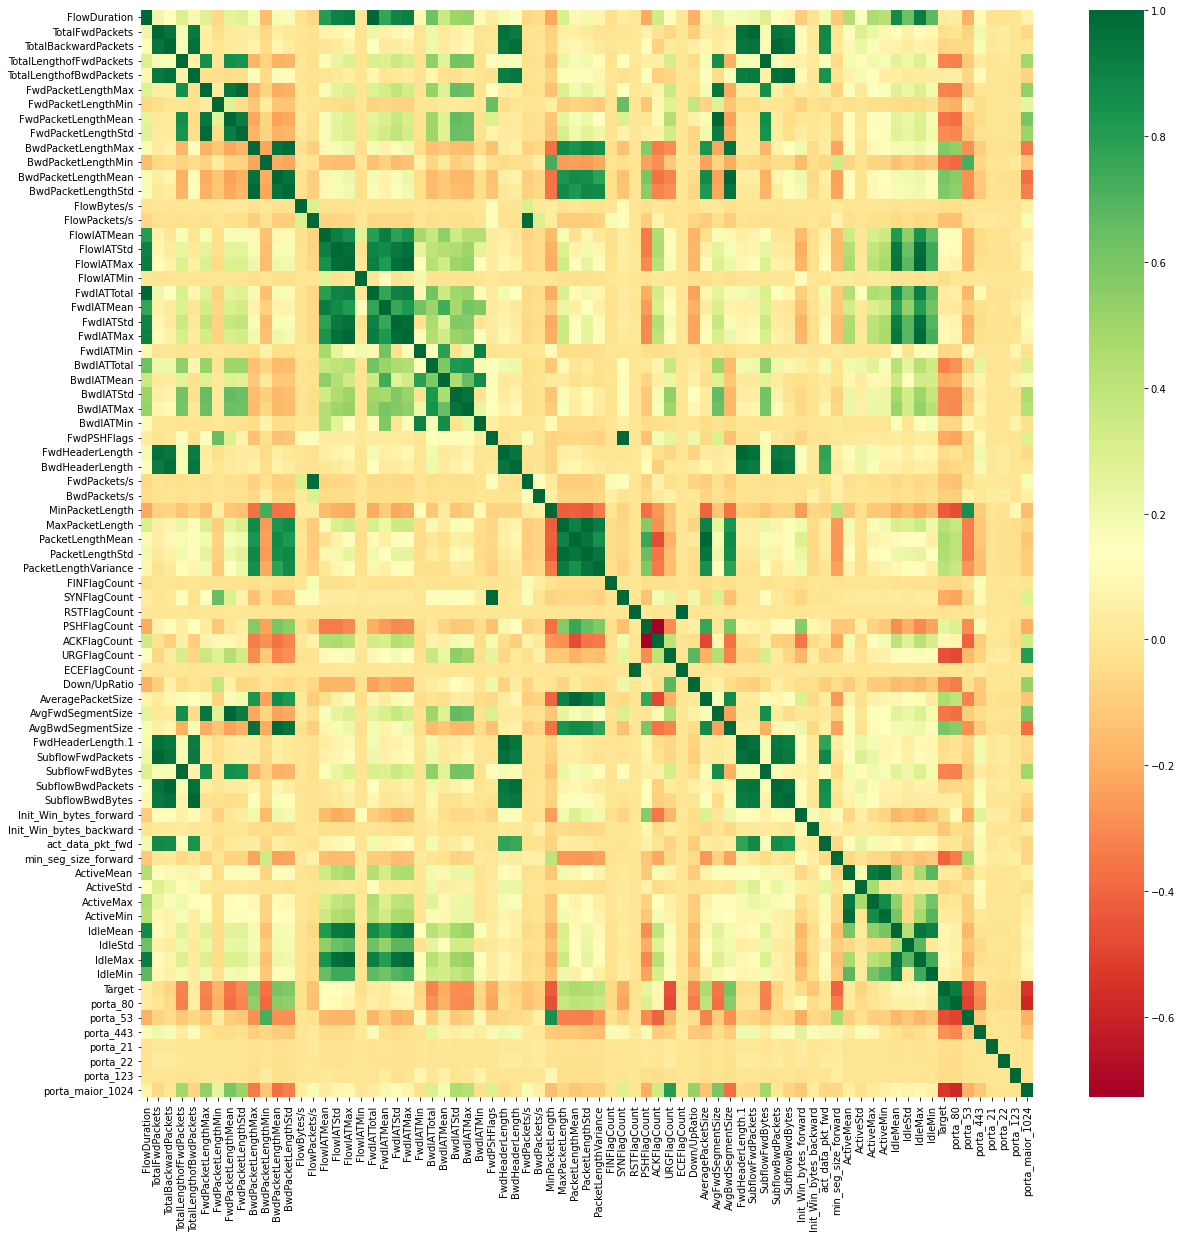

In [48]:
X = df_treino.iloc[:,0:79]  #independent columns
y = df_treino.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_treino.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_treino[top_corr_features].corr(),annot=False,cmap="RdYlGn")

 <font size="4">ROC curve</font>

In [49]:
r_probs = [0 for _ in range(len(y_teste))]
r_auc = roc_auc_score(y_teste, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_teste, r_probs)

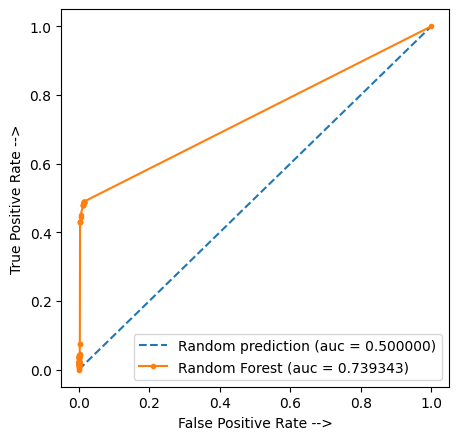

In [50]:
Y_pred_random_forest_fpr, Y_pred_random_forest_tpr, threshold = roc_curve(y_validation, Y_pred_random_forest)
auc_Y_pred_random_forest = auc(Y_pred_random_forest_fpr, Y_pred_random_forest_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (auc = %f)' % r_auc)


plt.plot(Y_pred_random_forest_fpr, Y_pred_random_forest_tpr, marker='.', label='Random Forest (auc = %f)' % auc_Y_pred_random_forest)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [51]:
np.set_printoptions(precision=4)
#For ROC curve
Y_pred_random_forest = RandomForestModel.predict_proba(x_validation)
Y_pred_random_forest = [c[1] for c in Y_pred_random_forest]



print('\n\nRandom Forest\n')
random_forest_confusion_matrix = (confusion_matrix(y_validation, RandomForestModel.predict(x_validation)))
random_forest_precision = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,0]+random_forest_confusion_matrix[1,1]))
random_forest_recall = (random_forest_confusion_matrix[1,1]/(random_forest_confusion_matrix[1,1]+random_forest_confusion_matrix[0,1]))
random_forest_False_Negatives_Rate = (random_forest_confusion_matrix[1,0]/(random_forest_confusion_matrix[0,1]+random_forest_confusion_matrix[0,0]))
random_forest_False_Positives_Rate = (random_forest_confusion_matrix[0,1]/(random_forest_confusion_matrix[0,1]+random_forest_confusion_matrix[1,1]))
random_forest_F1 = ((2*random_forest_precision*random_forest_recall)/(random_forest_precision+random_forest_recall))

print('Confusion_Matrix: \n', random_forest_confusion_matrix)
print('Precision:', str(format(random_forest_precision, '.4f').replace('.',',')))
print('Recall:', str(format(random_forest_recall, '.4f').replace('.',',')))
print('False Negatives Rate:', str(format(random_forest_False_Negatives_Rate, '.4f').replace('.',',')))
print('False Positive Rate:', str(format(random_forest_False_Positives_Rate, '.4f').replace('.',',')))
print('AUC:', str(format(auc_Y_pred_random_forest, '.4f').replace('.',',')))


#print('False Positives Rate:', random_forest_False_Positives_Rate)
#print('F1:', random_forest_F1)




Random Forest

Confusion_Matrix: 
 [[994247     79]
 [256535   5404]]
Precision: 0,0206
Recall: 0,9856
False Negatives Rate: 0,2580
False Positive Rate: 0,0144
AUC: 0,7393


In [52]:
#taxa de verdadeiro positivo = sensibilidade = TP/(TP+FN)
#taxa de falso positivo = 1-specificidade = FP/(FP+TN)